# Zadanie 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
%matplotlib inline

In [615]:
def myPCA(X):
    
   
    X_std = ((X.T - np.mean(X, axis=1)) /np.std(X, axis=1)).T
       
    S = np.cov(X_std)
    eigenValues, eigenVectors = np.linalg.eig(S)
    
    #idx = eigenValues.argsort()[::-1]   
    #eigenValues = eigenValues[idx]
    #eigenVectors = eigenVectors[:,idx]
    

    
    Y = (1/np.sqrt(eigenValues) * np.dot(eigenVectors, X_std).T).T
    return X, X_std, Y
    
    
def plot(X,X_std,Y):
    #pca = PCA(2)
    #pcs = pca.fit_transform(X.T)

    plt.scatter(X[0,], X[1,], color='blue')
    #plt.scatter(X_std[0,], X_std[1,], color = 'orange')
    if np.std(Y[0,]) > np.std(Y[1,]):
        plt.scatter(Y[0,],Y[1,], color='green')
    else:
        plt.scatter(Y[1,],Y[0,], color='green')
    #plt.scatter(pcs[:,0], pcs[:,1], color = 'red')
    

In [48]:
class myPCA:
    def __init__(self):
        self.data = None
        self.mean_data = None 
        self.sd_data = None 
        self.std_data = None # standarized data (with mean=0 and var=1)
        # eigen values and eigen vectors of covatiance matrix
        self.eigenValues = None
        self.eigenVectors = None
        self.idx = None
        self.projected_data = None


    def fit(self, data):
        
        self.data = data
        # Standarize data
        self.mean_data = np.mean(data, axis=0)
        self.sd_data = np.std(data, axis=0)
        
        # standarize data to mean=0
        std_data = data - self.mean_data
        
        # standarize data to mean 0 and variance 1
        std_data = (data - self.mean_data) / self.sd_data
        
        self.std_data = std_data

        
        # Covariance matrix of standarized data
        S = np.cov(std_data.T)
        
  
        # Eigen values and eigen vectors (with sorting)
        # linalg.eig can produce comples eigenvalues, co instead i used eigh
        self.eigenValues, self.eigenVectors = np.linalg.eigh(S)
        
        #self.eigenValues = np.real(self.eigenValues)
        #self.eigenVectors = np.real(self.eigenVectors)
        
        # sort eigenvalues in descending order
        idx = np.argsort(self.eigenValues)
        idx = idx[::-1]
        self.eigenVectors = self.eigenVectors[:,idx]
        self.eigenValues = self.eigenValues[idx]
        self.idx = idx
        self.projected_data = self.project(data,2)
        
    def print_properties(self):
    
        print(f"Original data: \n Mean: {np.round(self.mean_data,2)} \n covariance:\n {np.round(np.cov(self.data.T),2)}\n")
        print(f"After standarization:\n Mean: {np.round(np.mean(self.std_data, axis=0),2)} \ncovariance:\n {np.round(np.cov(self.std_data.T),2)}\n")
        print(f"After PCA: \nmean:\n {np.round(np.mean(self.projected_data, axis=0),2)} \ncovariance:\n {np.round(np.cov(self.projected_data.T),2)}")
            
        
        
        # Print the coverage of variance
#         table = pd.DataFrame(index=['eVal','eTotal', 'Idiv%', '%'], columns=list(range(len(self.eigenValues))))
#         current_val = 0
#         total_val = np.sum(self.eigenValues)
#         for i, val in enumerate(self.eigenValues):
#             current_val += val
#             table[i] = [val, current_val, val/total_val, current_val/total_val]
#         print('Coverage of Variance:')
#         print(table)
#         print("\n")

    # Project data
    def project(self, data, d):
        # do the same transformation as on original data
        adj_data = (data - self.mean_data) / self.sd_data

        # Use only highest eigen values to preserve most information
        eigenVectors = self.eigenVectors[:,:d]
        eigenValues = self.eigenValues[:d]
        
        return  np.dot(adj_data,eigenVectors) * 1/np.sqrt(eigenValues)

    # Reverse transformation
    def revert(self, projected_data, d):
        eigenVectors = self.eigenVectors[:,:d]
        eigenValues = self.eigenValues[:d]

        return  np.dot(projected_data*np.sqrt(eigenValues), eigenVectors.T)* self.sd_data + self.mean_data
    
    


# Zadanie 1

1.5673680110609978e-28


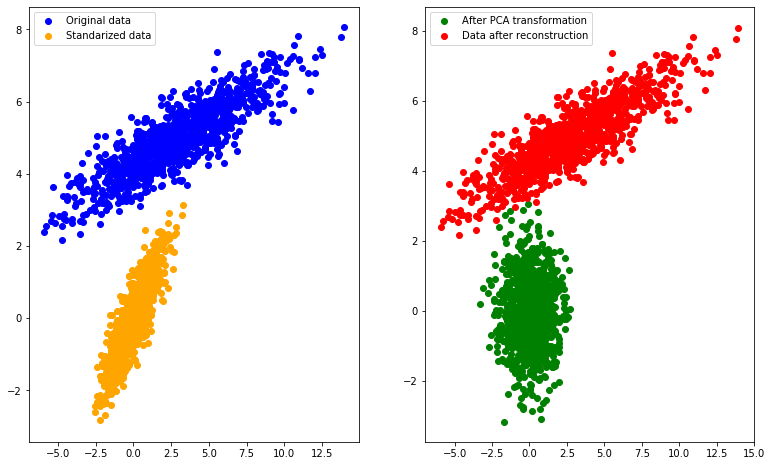

In [75]:
n = 1000
mean = np.array([3,5])
cov = np.array([[12,3],[3,1]])
x = np.random.multivariate_normal(mean,cov,n)    

pca = myPCA()
pca.fit(x)
pcs = pca.project(x, 2)


rev = pca.revert(pcs,2)

print(np.sum(np.square(rev-x)))
              
#pca.print_properties()
              
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(13,8))
ax1.scatter(x[:,0], x[:,1], color='blue')
ax1.scatter(pca.std_data[:,0],pca.std_data[:,1], color='orange')
ax1.legend(['Original data', 'Standarized data'])
#ax1.plot(pca.eigenValues * pca.eigenVectors.T+ pca.mean_data)

ax2.scatter(pcs[:,0],pcs[:,1], color='green')
ax2.scatter(rev[:,0],rev[:,1], color='red')
ax2.legend(['After PCA transformation', 'Data after reconstruction'])

In [78]:
pca.print_properties()

Original data: 
 Mean: [2.87 4.97] 
 covariance:
 [[11.6   2.9 ]
 [ 2.9   0.98]]

After standarization:
 Mean: [ 0. -0.] 
covariance:
 [[1.   0.86]
 [0.86 1.  ]]

After PCA: 
mean:
 [0. 0.] 
covariance:
 [[1. 0.]
 [0. 1.]]


### h)

### i) 3 chmury z rozkladu normalnego

Original data: 
 Mean: [1.94 4.69] 
 covariance:
 [[405.55 117.74]
 [117.74  34.44]]

After standarization:
 Mean: [-0. -0.] 
covariance:
 [[1. 1.]
 [1. 1.]]

After PCA: 
mean:
 [0. 0.] 
covariance:
 [[ 1. -0.]
 [-0.  1.]]


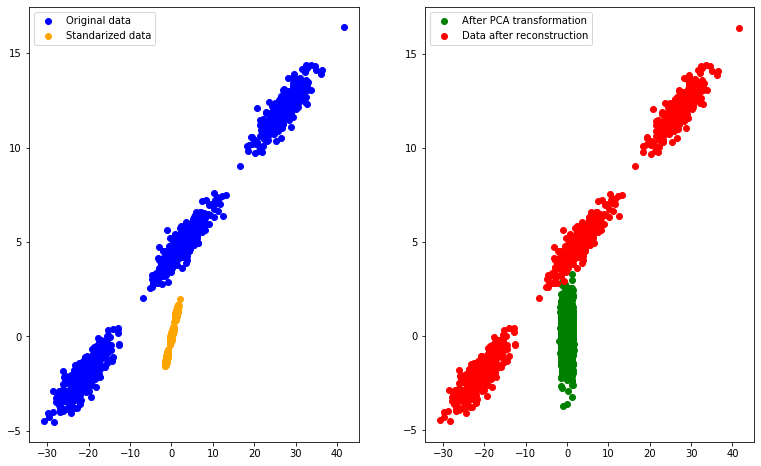

In [82]:
p = np.array([1/3,1/3,1/3])
mu1 = np.array([-21,-2])
mu2 = np.array([3,5])
mu3 = np.array([27,12])
cov = np.array([[12,3],[3,1]])

n=1000
data = []
for i in range(n):
    ran = np.random.choice(np.array([1,2,3]),size=1, p=p)
    if ran == 1:
        x = np.random.multivariate_normal(mu1,cov,1)
    if ran == 2:
        x = np.random.multivariate_normal(mu2,cov,1)    
    if ran == 3:
        x = np.random.multivariate_normal(mu3,cov,1) 
    data.append(x)
x = np.vstack(data)

pca = myPCA()
pca.fit(x)
pcs = pca.project(x, 2)
rev = pca.revert(pcs,2)


fig, (ax1,ax2) = plt.subplots(1,2, figsize=(13,8))
ax1.scatter(x[:,0], x[:,1], color='blue')
ax1.scatter(pca.std_data[:,0],pca.std_data[:,1], color='orange')
ax1.legend(['Original data', 'Standarized data'])

ax2.scatter(pcs[:,0],pcs[:,1], color='green')
ax2.scatter(rev[:,0],rev[:,1], color='red')
ax2.legend(['After PCA transformation', 'Data after reconstruction'])

pca.print_properties()

### j) Iris

In [84]:
from sklearn.datasets import load_iris

Original data: 
 Mean: [5.84 3.06 3.76 1.2 ] 
 covariance:
 [[ 0.69 -0.04  1.27  0.52]
 [-0.04  0.19 -0.33 -0.12]
 [ 1.27 -0.33  3.12  1.3 ]
 [ 0.52 -0.12  1.3   0.58]]

After standarization:
 Mean: [-0. -0. -0. -0.] 
covariance:
 [[ 1.01 -0.12  0.88  0.82]
 [-0.12  1.01 -0.43 -0.37]
 [ 0.88 -0.43  1.01  0.97]
 [ 0.82 -0.37  0.97  1.01]]

After PCA: 
mean:
 [ 0. -0.] 
covariance:
 [[ 1. -0.]
 [-0.  1.]]


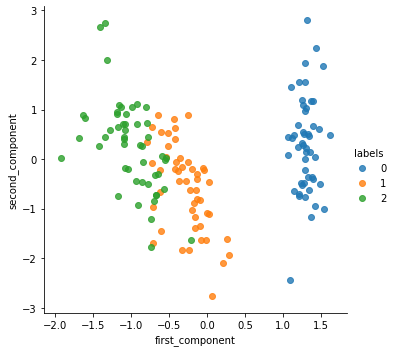

In [103]:
IrisX, IrisY = load_iris(True)

pca = myPCA()
pca.fit(IrisX)

projected_IrisX = pca.project(IrisX, 2)

          
pca.print_properties()

df = pd.DataFrame(dict(first_component=projected_IrisX[:,0], second_component=projected_IrisX[:,1], labels=y))

sns.lmplot('first_component', 'second_component', data=df, hue='labels', fit_reg=False)
              

### k) Błąd odtworzenia

In [105]:
print(f"Sum of square errors: {np.sum(np.square(reversed_IrisX-IrisX))}" )
reversed_IrisX = pca.revert(projected_IrisX,2)


Sum of square errors: 21.32238408052758



### l)
https://stats.stackexchange.com/questions/266864/why-is-the-sum-of-eigenvalues-of-a-pca-equal-to-the-original-variance-of-the-dat

In [104]:
np.sum(pca.eigenValues), np.sum(np.square( pca.sd_data ))

(4.026845637583891, 4.542470666666667)

# Zadanie 2

In [139]:
from scipy.io import loadmat

# Load train data
train_file = loadmat("/home/michal/Dokumenty/Studia/UWr/7/Eksploracja_Danych/lista7/Lista07Dane/ReducedImagesForTraining.mat")
X_train = train_file['images']
X_train = X_train.T

# Load test data
test_file = loadmat("/home/michal/Dokumenty/Studia/UWr/7/Eksploracja_Danych/lista7/Lista07Dane/ReducedImagesForTesting.mat")
X_test = test_file['images']
X_test = X_test.T

# Labels
y_train = np.round(np.arange(3,np.shape(X_train)[0]+3) / 5,0).astype(int)
y_test = np.round(np.arange(1,np.shape(X_test)[0]+1)-1 / 2 +1,0).astype(int) / 2

np.shape(X_train) , np.shape(X_test), np.shape(y_train), np.shape(y_test)

((250, 4920), (100, 4920), (250,), (100,))

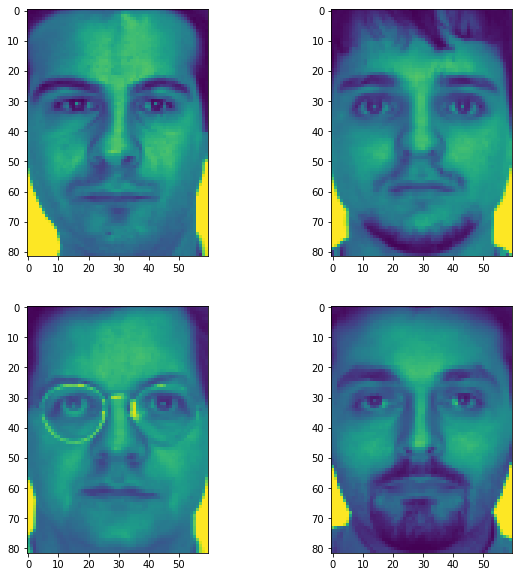

In [110]:
# Look on images
n = 60
m = 82

fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs[0,0].imshow(X_train[0,:].reshape(n,m).T)
axs[0,1].imshow(X_train[5,:].reshape(n,m).T)
axs[1,0].imshow(X_train[10,:].reshape(n,m).T)
axs[1,1].imshow(X_train[15,:].reshape(n,m).T)

In [117]:
pca = myPCA()
pca.fit(X_train)


In [119]:
projected = pca.project(X_test, 2)

pca.eigenValues
#rev = pca.revert(pcs,50)

#np.sum(np.square(rev-data))



array([ 1.92143408e+03,  3.97489561e+02,  3.06584856e+02, ...,
       -1.81748517e-13, -1.87107189e-13, -2.35478020e-13])

# Zadanie 3

In [120]:
# Function to calculate distance matrix
def dist(X,Y):
    return (X**2).sum(axis=1)[np.newaxis].T - 2 * X.dot(Y.T) + (Y**2).sum(axis=1)[np.newaxis]

Score: 17.0 %


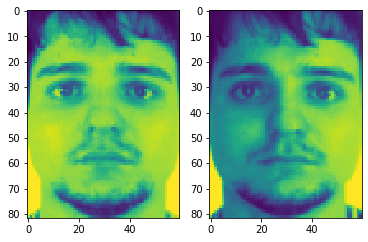

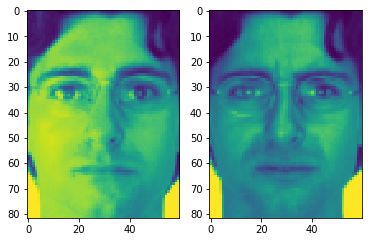

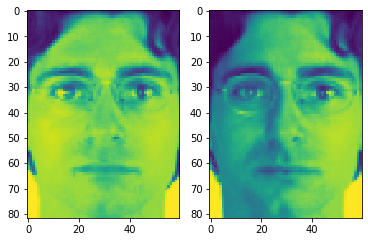

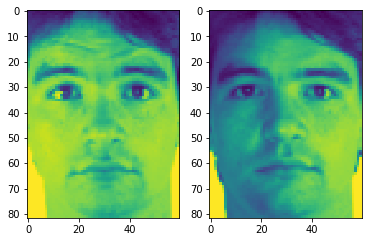

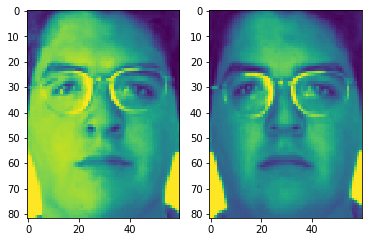

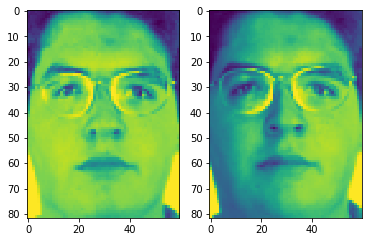

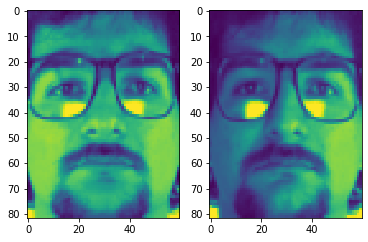

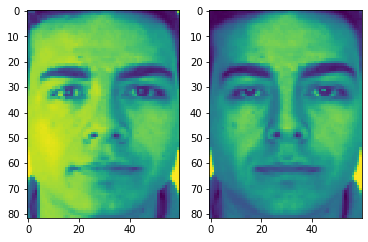

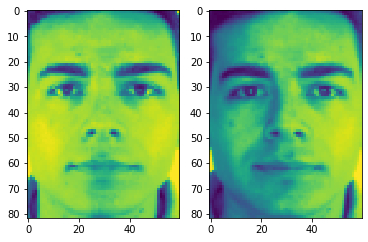

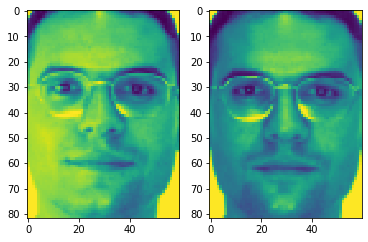

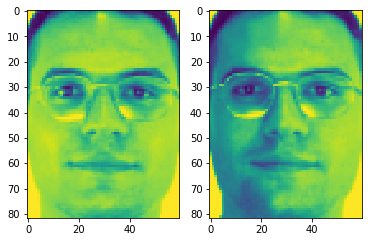

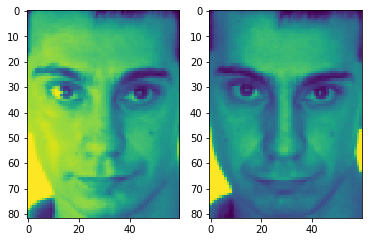

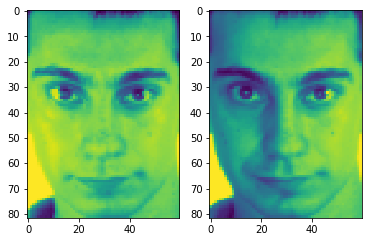

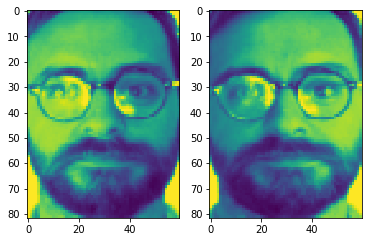

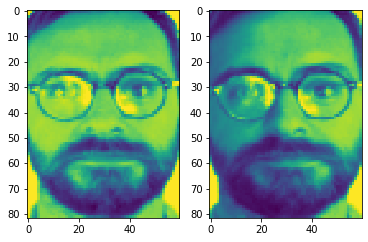

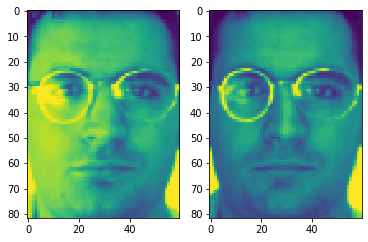

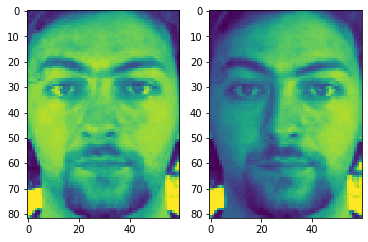

In [141]:

dists = dist(X_train, X_test)

y_predict = np.floor((np.argmin(dists, axis=0))/5).astype(int) +1
good_preds = np.sum(y_predict == y_test)

for i in range(good_preds):

    idx_test = np.argwhere(y_predict == y_test).flatten()
    idx_train =np.argmin(dists, axis=0)[y_predict == y_test]

    fig, (ax1,ax2) = plt.subplots(1, 2)
    ax1.imshow(X_test[idx_test[i],:].reshape(n,m).T)
    ax2.imshow(X_train[idx_train[i],:].reshape(n,m).T)

print(f"Score: {good_preds/np.shape(X_test)[0] * 100} %")

# Zadanie 4

In [142]:
dims = 500


scores = []
for dim in range(dims):
    reduced_train = pca.project(X_train, dim)
    reduced_test = pca.project(X_test, dim)

    dists = dist(reduced_train, reduced_test)

    y_predict = np.floor((np.argmin(dists, axis=0))/5).astype(int) +1
    good_preds = np.sum(y_predict == y_test)
    
    scores.append(good_preds)
    #print(f"reduction dimension:{dim}, score:{good_preds}" )




Text(0, 0.5, '% Poprawnych klasyfikacji')

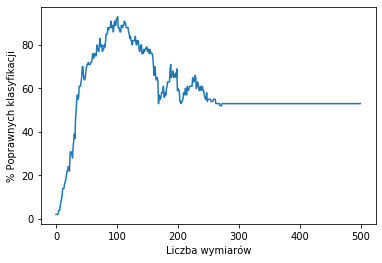

In [149]:
plt.plot(scores)
plt.xlabel('Liczba wymiarów')
plt.ylabel('% Poprawnych klasyfikacji')

/home/michal/PycharmProjects/ML/venv/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


Score: 93.0 %


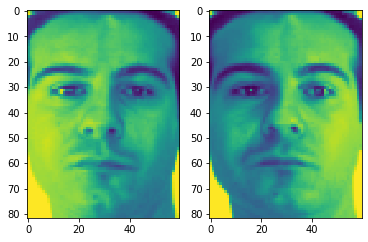

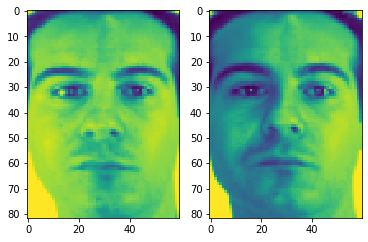

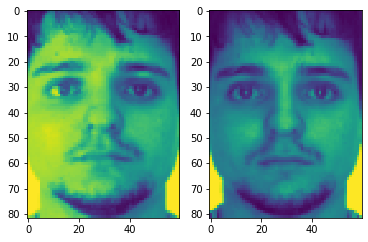

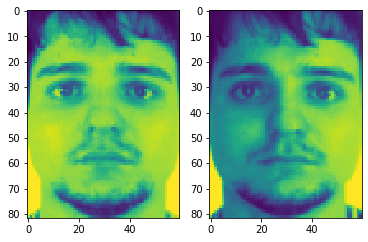

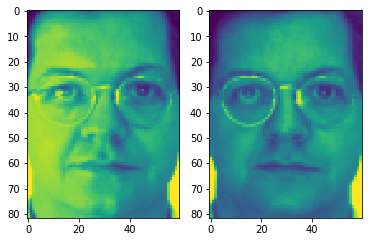

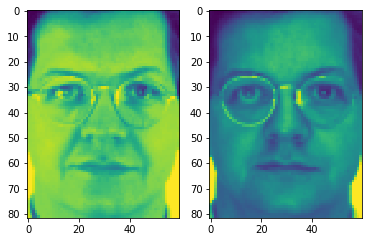

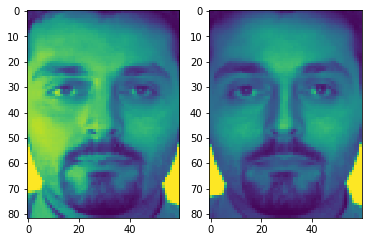

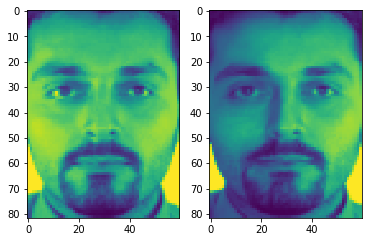

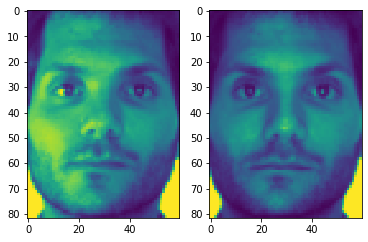

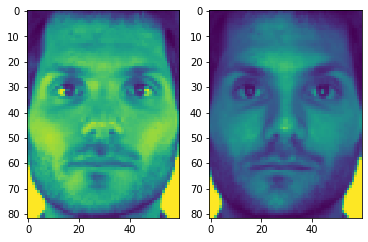

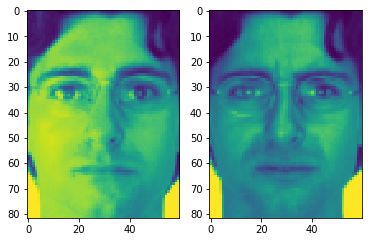

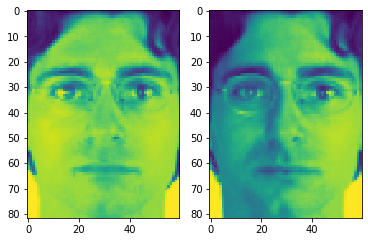

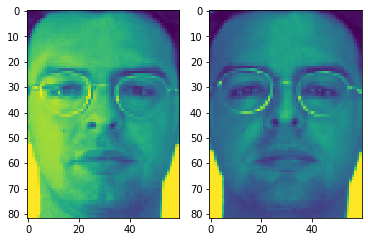

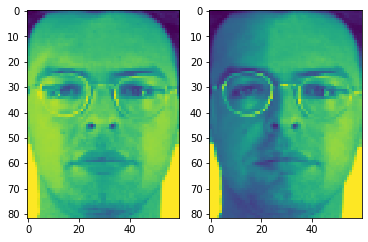

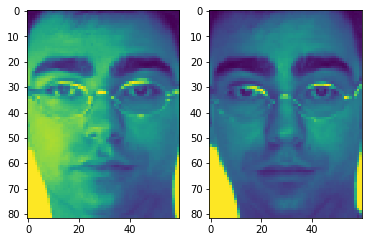

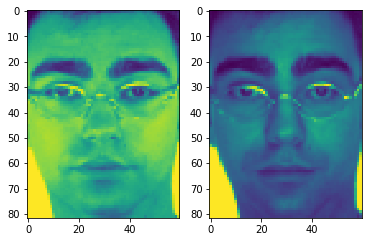

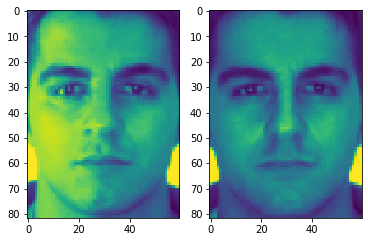

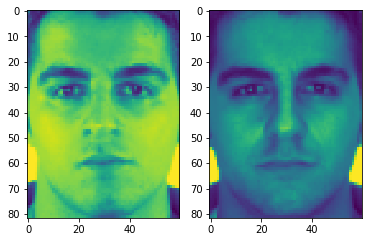

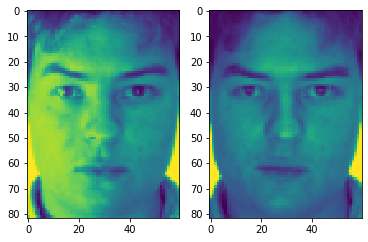

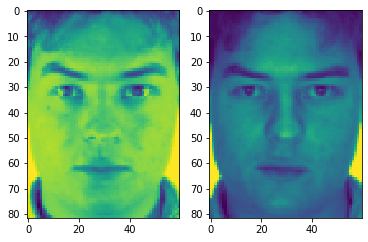

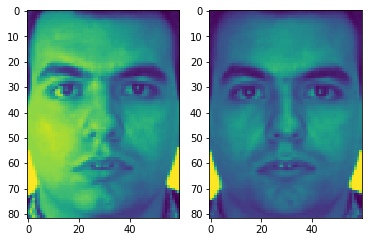

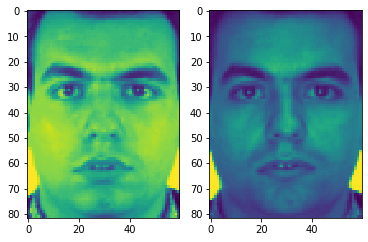

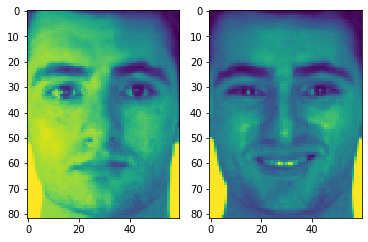

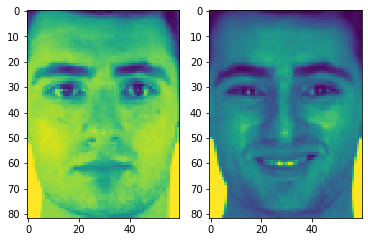

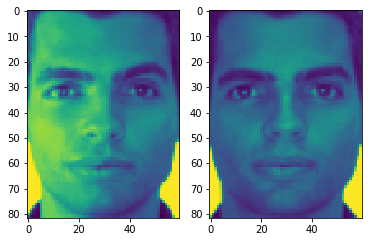

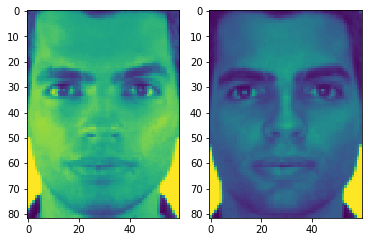

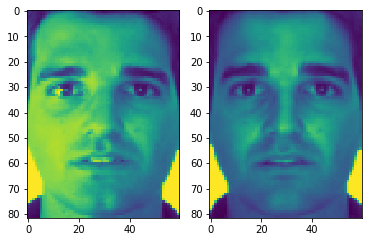

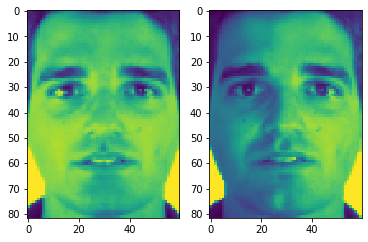

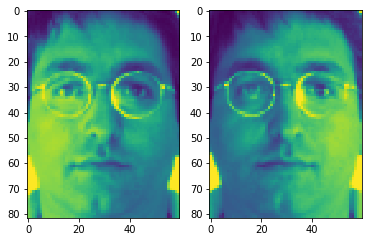

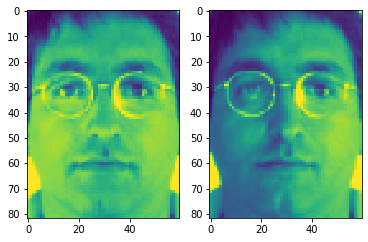

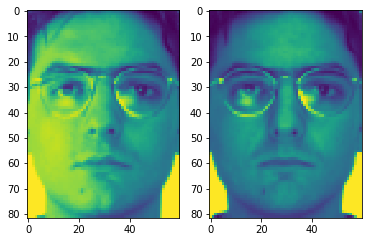

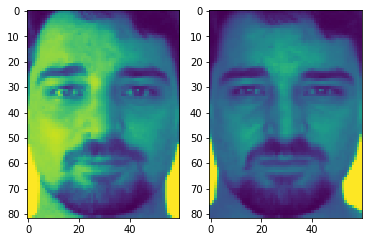

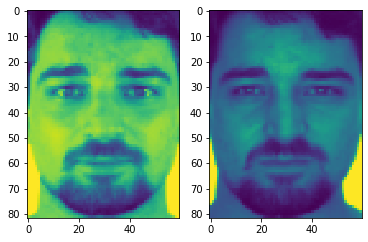

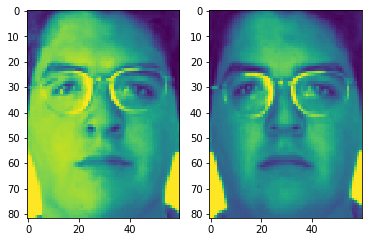

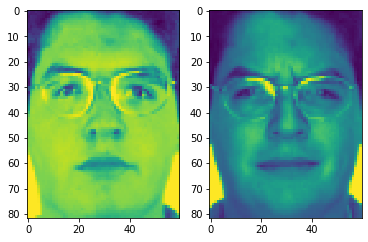

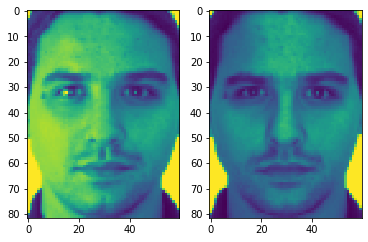

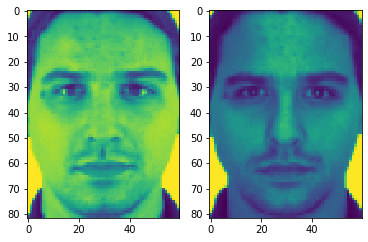

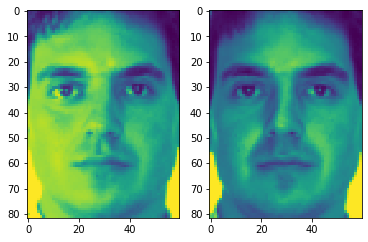

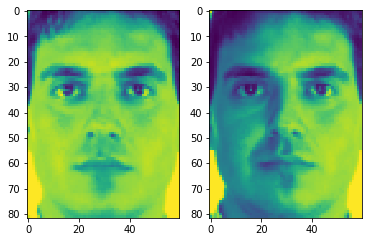

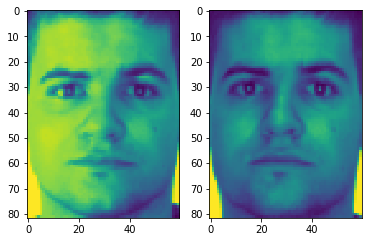

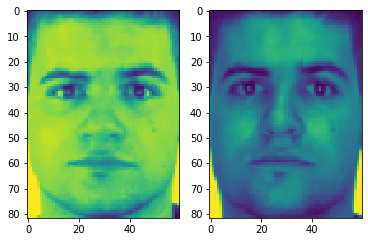

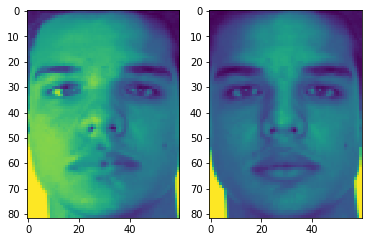

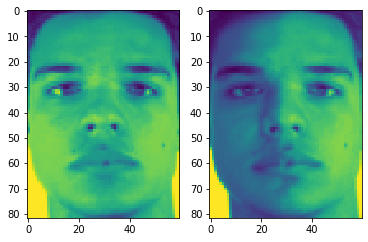

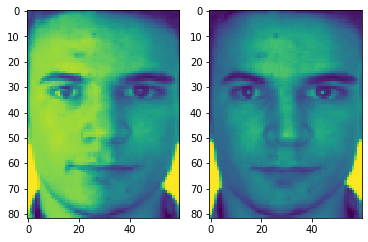

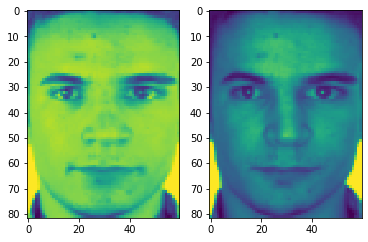

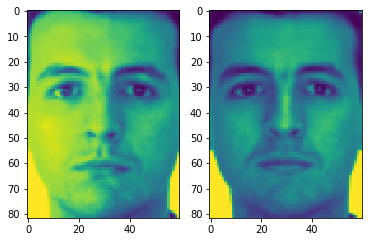

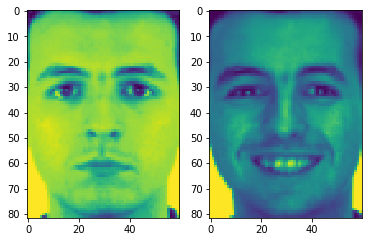

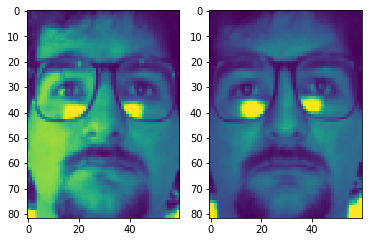

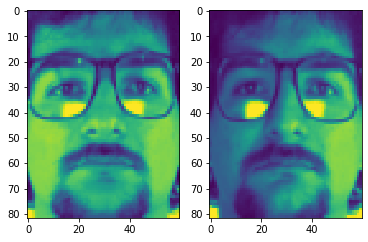

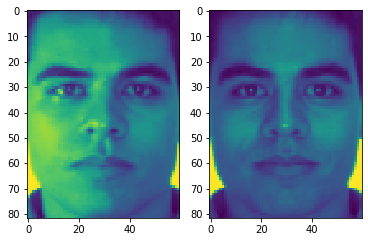

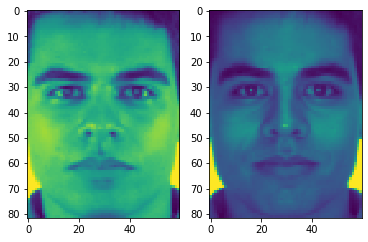

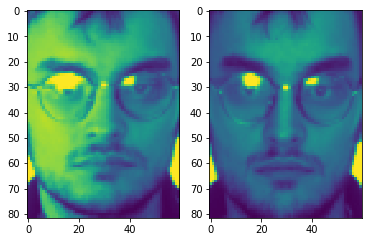

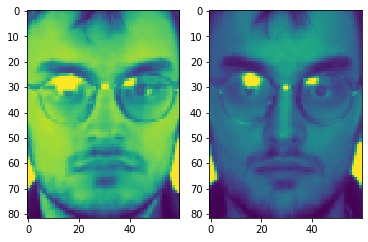

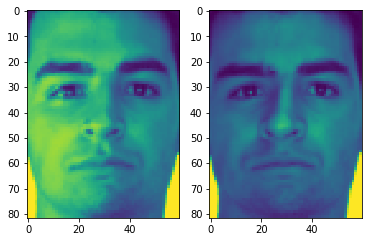

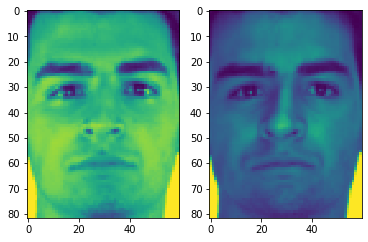

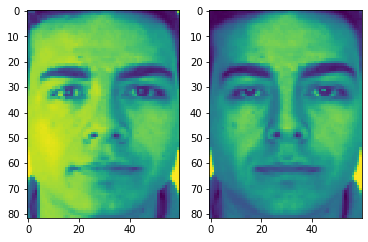

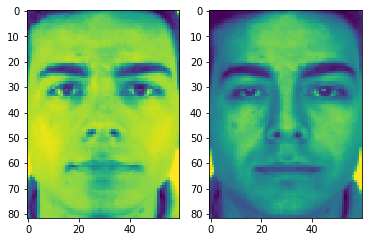

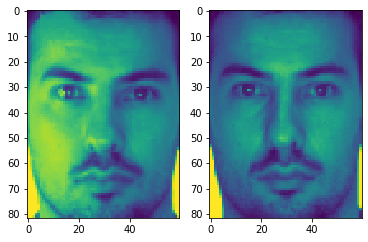

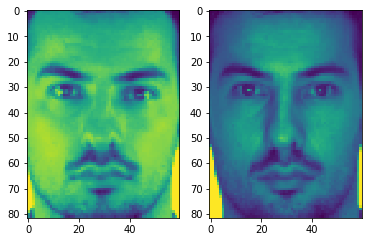

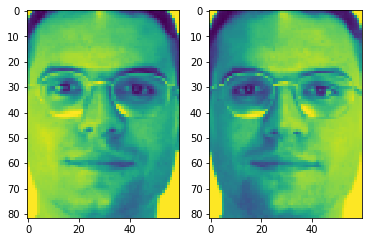

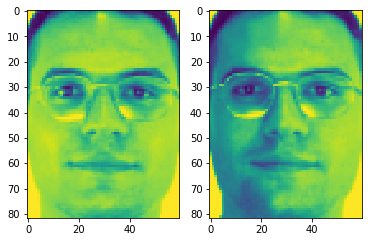

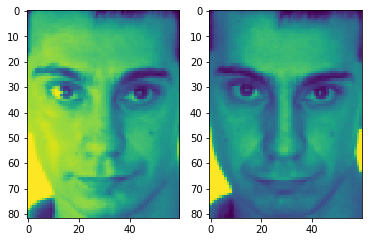

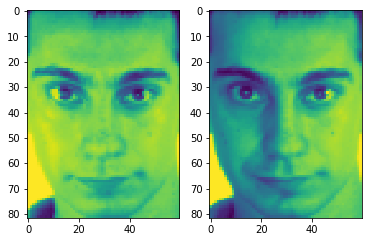

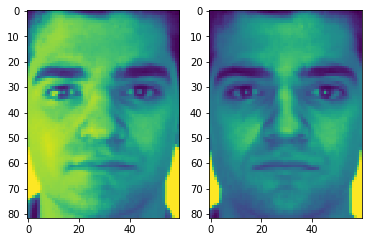

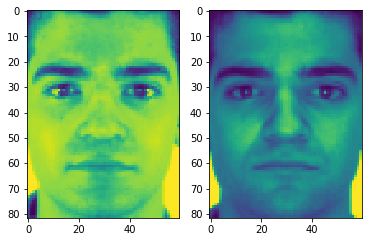

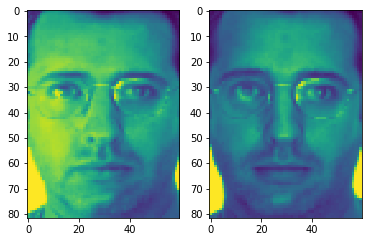

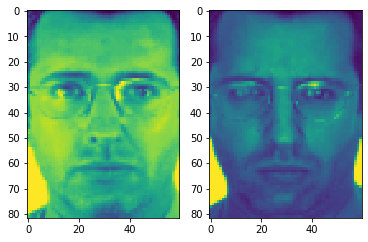

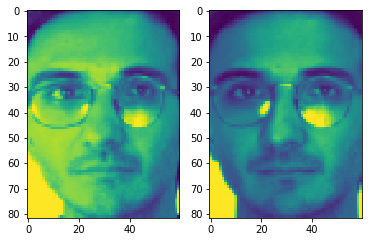

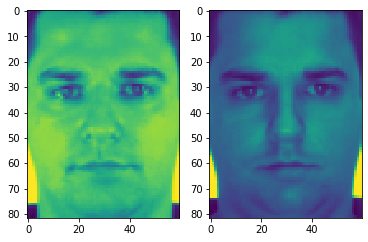

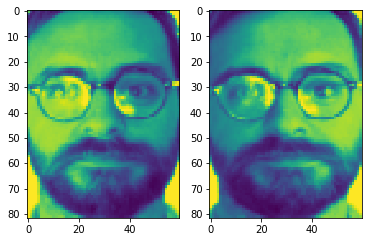

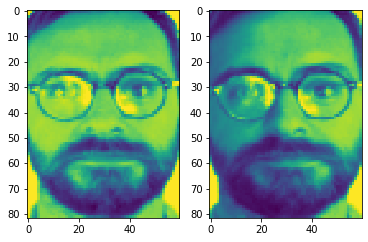

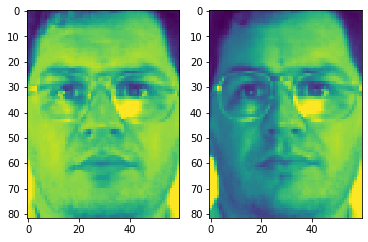

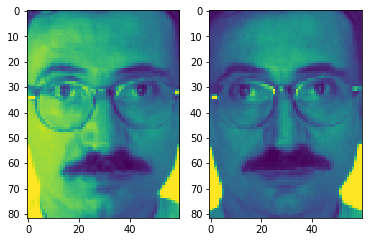

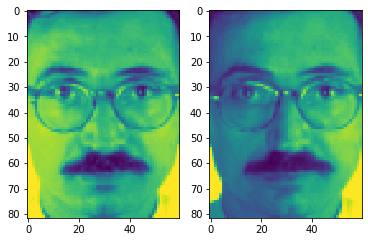

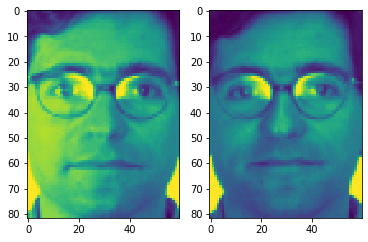

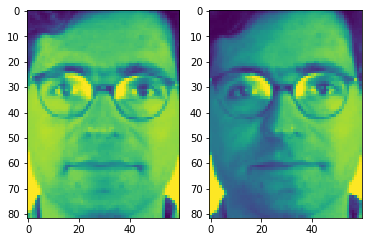

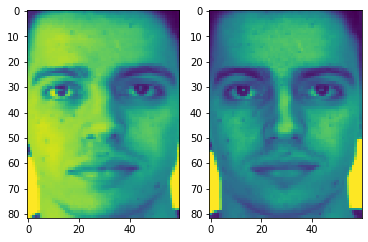

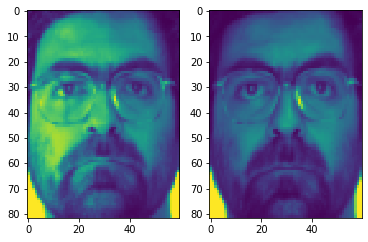

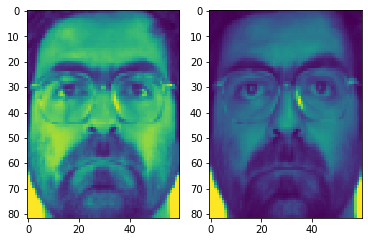

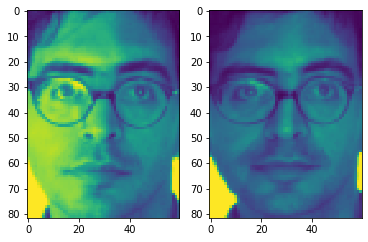

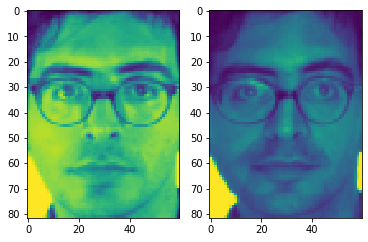

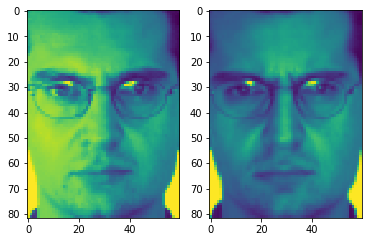

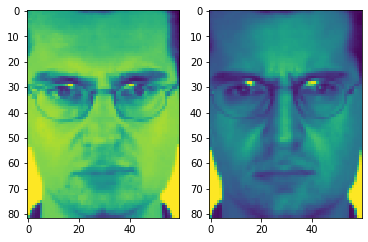

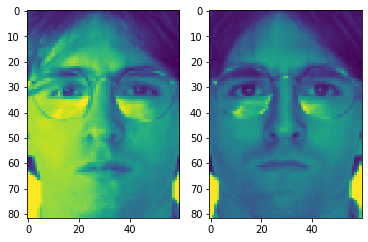

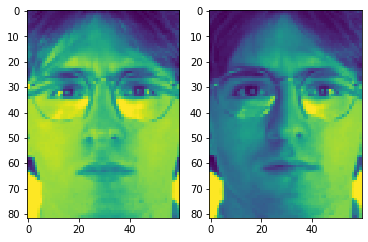

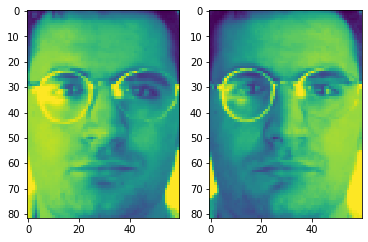

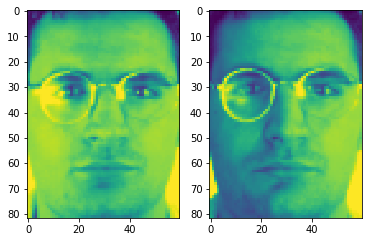

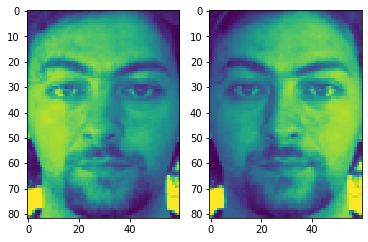

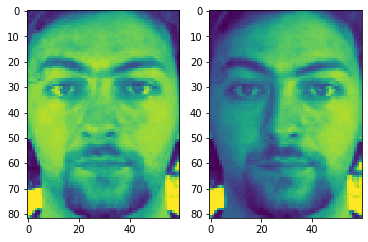

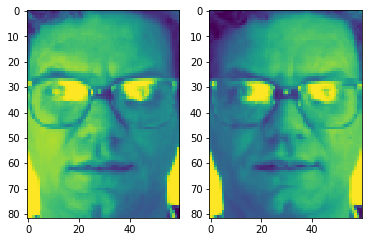

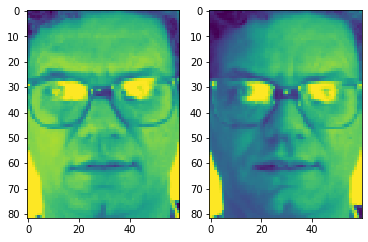

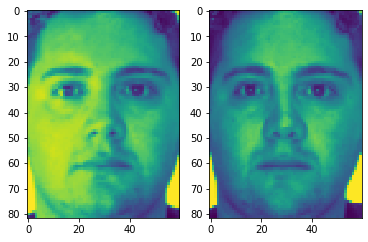

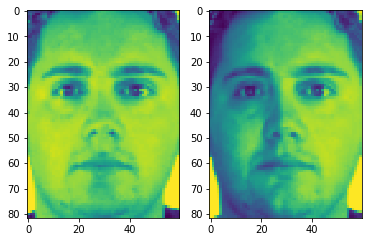

In [148]:
best_dim = np.argmax(scores)

reduced_train = pca.project(X_train, best_dim)
reduced_test = pca.project(X_test, best_dim)

dists = dist(reduced_train, reduced_test)

y_predict = np.floor((np.argmin(dists, axis=0))/5).astype(int) +1
good_preds = np.sum(y_predict == y_test)

for i in range(good_preds):

    idx_test = np.argwhere(y_predict == y_test).flatten()
    idx_train =np.argmin(dists, axis=0)[y_predict == y_test]

    fig, (ax1,ax2) = plt.subplots(1, 2)
    ax1.imshow(X_test[idx_test[i],:].reshape(n,m).T)
    ax2.imshow(X_train[idx_train[i],:].reshape(n,m).T)

print(f"Score: {good_preds/np.shape(X_test)[0] * 100} %")

# Zadanie 5

In [150]:
from sklearn.neighbors import KNeighborsClassifier

In [169]:
scores = []
ks = 20
for k in range(1,ks):

    KNN = KNeighborsClassifier(k)
    KNN.fit(X_train, y_train)
    y_predict = KNN.predict(X_test)
    scores.append(np.sum(y_predict == y_test))
    

Najlepsze k: 3


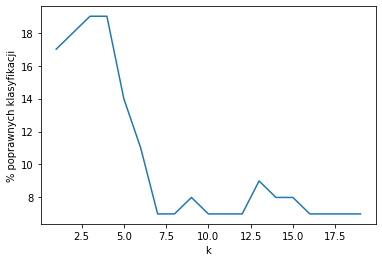

In [170]:
plt.plot(range(1,ks), scores)
plt.xlabel('k')
plt.ylabel('% poprawnych klasyfikacji')
print(f"Najlepsze k: {np.argmax(scores)+1}" )

Score: 19.0 %


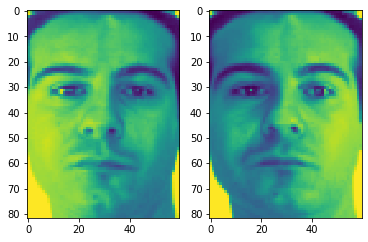

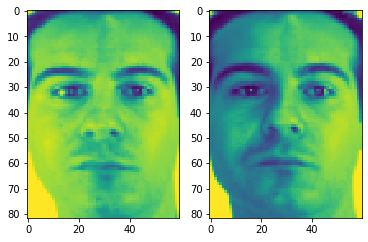

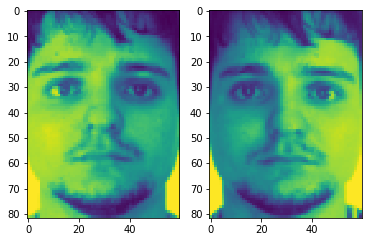

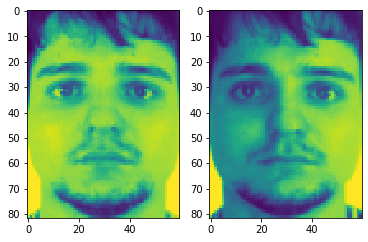

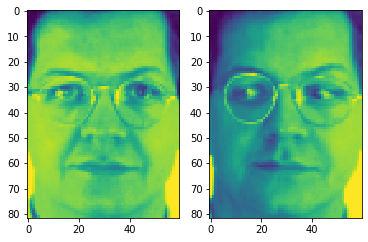

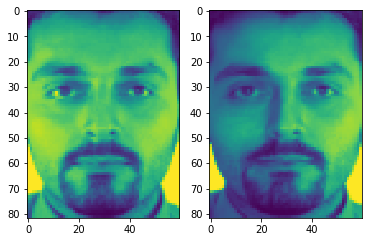

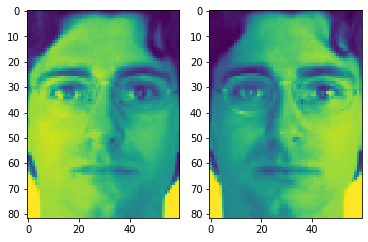

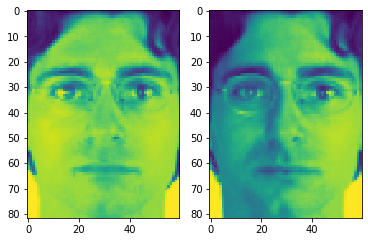

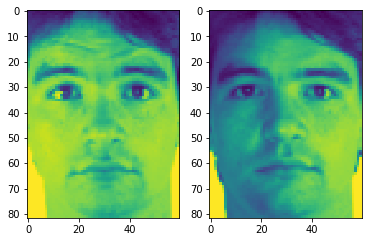

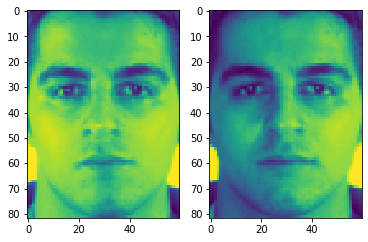

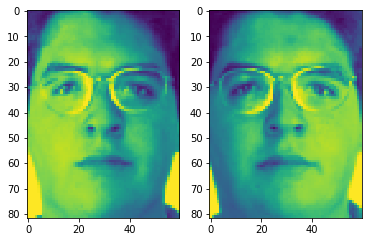

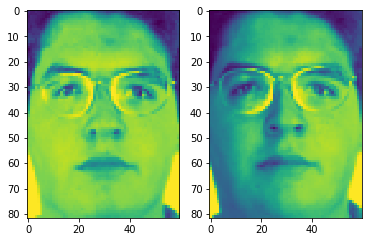

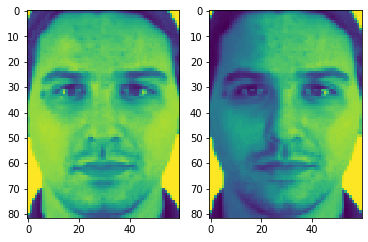

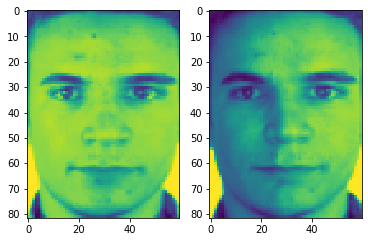

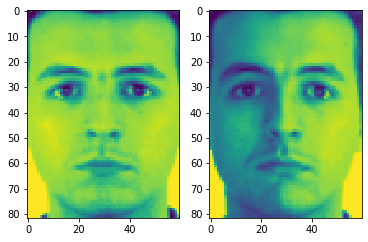

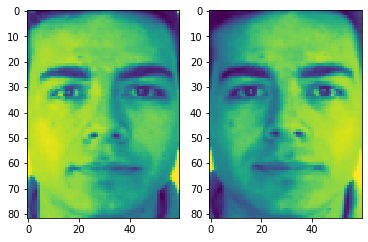

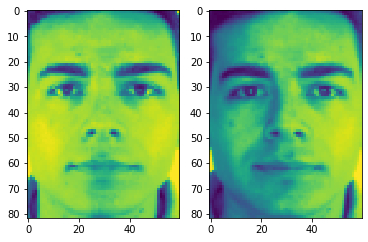

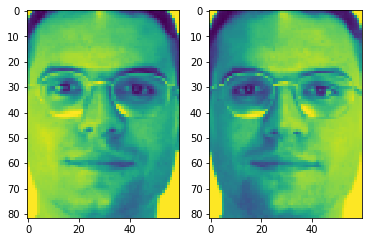

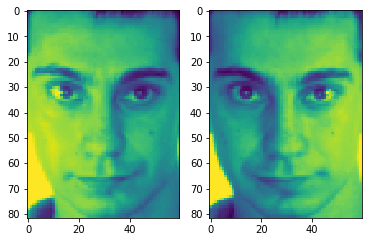

In [162]:
KNN = KNeighborsClassifier(4)
KNN.fit(X_train, y_train)
y_predict = KNN.predict(X_test)

good_preds = np.sum(y_predict == y_test)

for i in range(good_preds):

    idx_test = np.argwhere(y_predict == y_test).flatten()
    idx_train = y_predict[ np.argwhere(y_predict == y_test).flatten() ] *5-1

    fig, (ax1,ax2) = plt.subplots(1, 2)
    ax1.imshow(X_test[idx_test[i],:].reshape(n,m).T)
    ax2.imshow(X_train[idx_train[i],:].reshape(n,m).T)
print(f"Score: {good_preds/np.shape(X_test)[0] * 100} %")

In [210]:
dims = 250
ks=5

scores = np.zeros(dims*ks).reshape(ks,dims)

for dim in range(1,dims):
    reducted_train = pca.project(X_train, dim)
    reducted_test = pca.project(X_test, dim)

    for k in range(0,ks):

        KNN = KNeighborsClassifier(k+1)
        KNN.fit(reducted_train, y_train)
        y_predict = KNN.predict(reducted_test)

        scores[k,dim] = np.sum(y_predict == y_test)


    #print(f"reduction dimension:{dim}, score:{good_preds}" )


Text(0, 0.5, '% Poprawnych klasyfikacji')

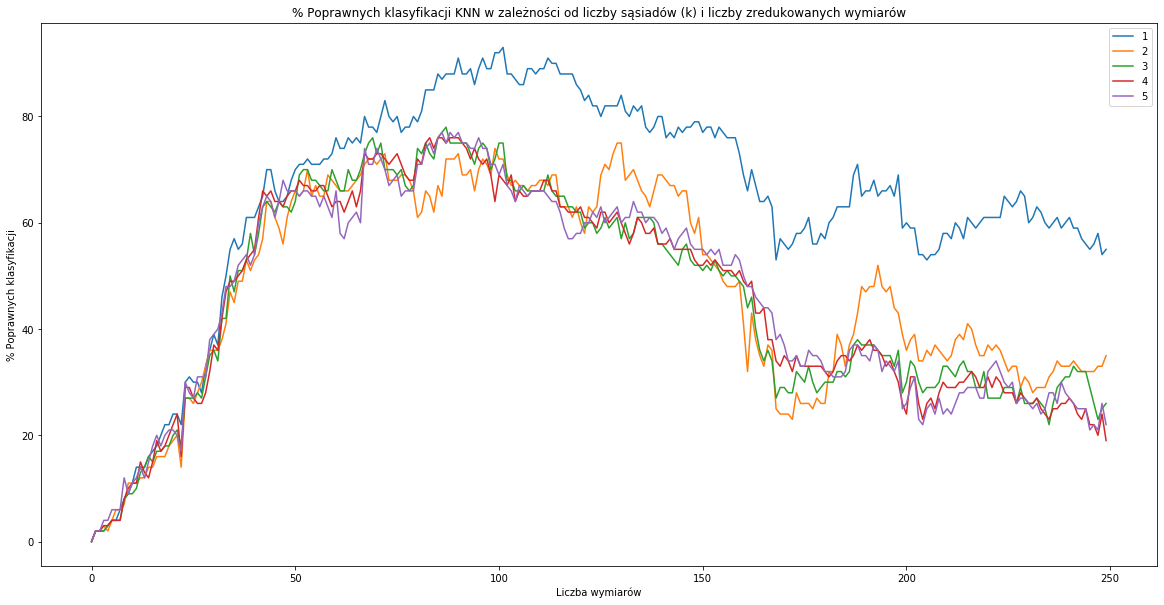

In [213]:
plt.figure(figsize=(20,10))
plt.plot(scores.T)
plt.legend([1,2,3,4,5])
plt.title('% Poprawnych klasyfikacji KNN w zależności od liczby sąsiadów (k) i liczby zredukowanych wymiarów')
plt.xlabel('Liczba wymiarów')
plt.ylabel('% Poprawnych klasyfikacji')


In [157]:
reducted_train = pca.project(X_train, 90)
reducted_test = pca.project(X_test, 90)


scores = []
for k in range(1,10):

    KNN = KNeighborsClassifier(k)
    KNN.fit(reducted_train, y_train)
    y_predict = KNN.predict(reducted_test)
    scores.append(np.sum(y_predict == y_test))

Najlepsze k: 1


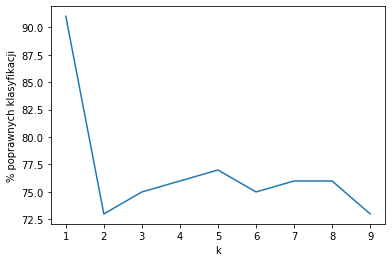

In [159]:
plt.plot(range(1,10), scores)
plt.xlabel('k')
plt.ylabel('% poprawnych klasyfikacji')
print(f"Najlepsze k: {np.argmax(scores)+1}" )

In [229]:
X = np.concatenate((X_train,X_test) )
y = np.concatenate((y_train,y_test) )


(350, 4920)

In [230]:
pca5 = myPCA()
pca5.fit(X)

In [224]:
from sklearn.model_selection import cross_validate

cv_scores = []
for k in range(1,30):
    KNN = KNeighborsClassifier(k)
    KNN.fit(X,y)

    cv_scores.append(np.mean(cross_validate(KNN,X,y, cv=5)['test_score']))
    

Najlepsze k: 1


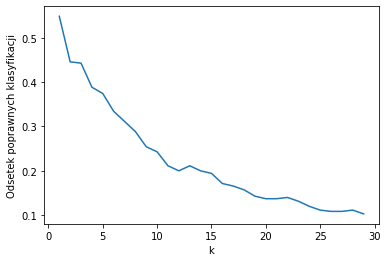

In [225]:
plt.plot(range(1,30), cv_scores)
plt.xlabel('k')
plt.ylabel('Odsetek poprawnych klasyfikacji')
print(f"Najlepsze k: {np.argmax(cv_scores)+1}" )

In [238]:
dims = 100
ks=5

cv_scores = np.zeros(dims*ks).reshape(ks,dims)

for dim in range(1,dims):
    reducted_X = pca5.project(X, dim)

    for k in range(0,ks):

        KNN = KNeighborsClassifier(k+1)
        KNN.fit(reducted_X, y)

        cv_scores[k,dim] = np.mean(cross_validate(KNN,reducted_X,y, cv=5)['test_score'])


# reducted_X = pca5.project(X, 100)

# cv_scores = []
# for k in range(1,5):
#     KNN = KNeighborsClassifier(k)
#     KNN.fit(reducted_X,y)

#     cv_scores.append(np.mean(cross_validate(KNN,reducted_X,y, cv=5)['test_score']))
    

Text(0, 0.5, 'Odsetek poprawnych klasyfikacji')

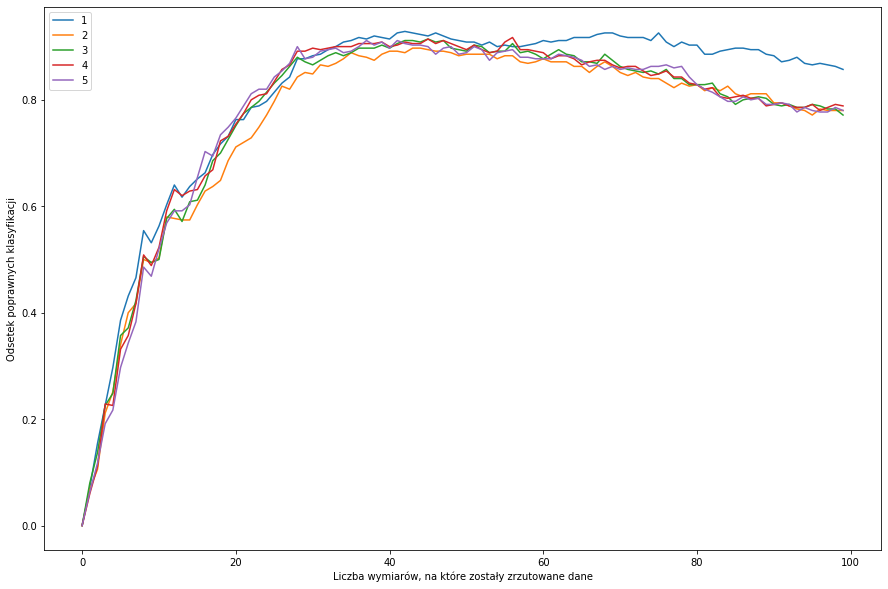

In [242]:
plt.figure(figsize=(15,10))
plt.plot(cv_scores.T)
plt.legend([1,2,3,4,5])
plt.xlabel('Liczba wymiarów, na które zostały zrzutowane dane')
plt.ylabel('Odsetek poprawnych klasyfikacji')
#print(f"Najlepsze k: {np.argmax(cv_scores)+1}" )